In [155]:
import pandas as pd
import numpy as np
import importlib


In [156]:
housing = pd.read_csv('../dataset/housing.csv')

In [157]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [158]:
housing['ocean_proximity'].value_counts(normalize=True)*100

ocean_proximity
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: proportion, dtype: float64

In [159]:
numeric_columns = housing.select_dtypes(include='float64').columns
numeric_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [160]:
from chapter3.notebook import visualization, custom_transformer

importlib.reload(visualization)

<module 'notebook.visualization' from 'D:\\data science\\Hands_On_Machine_Learning\\chapter2\\notebook\\visualization.py'>

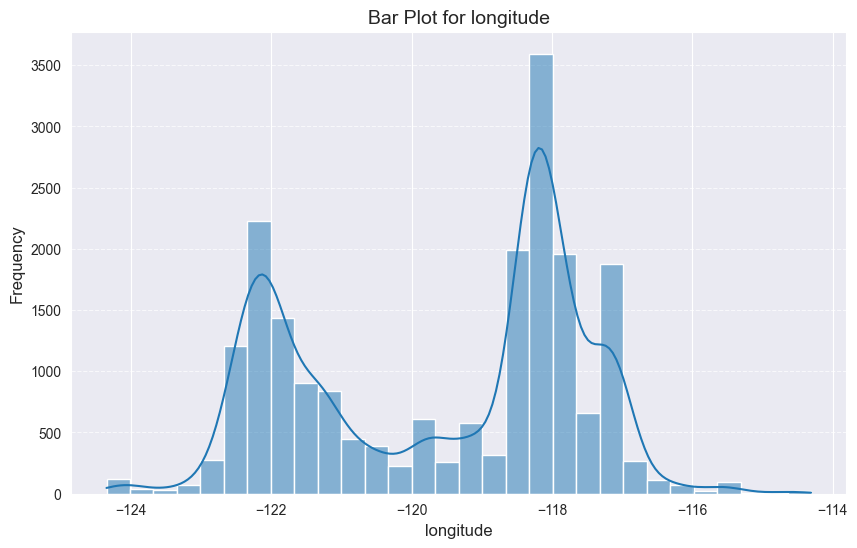

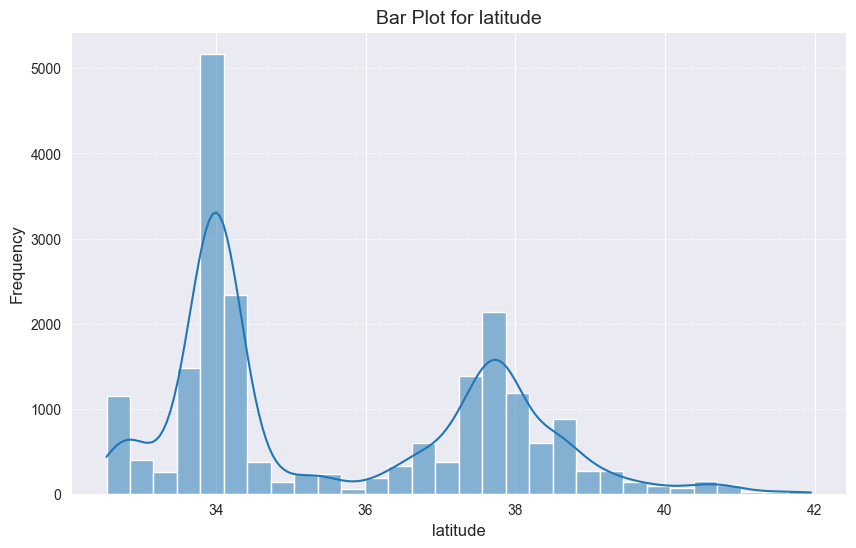

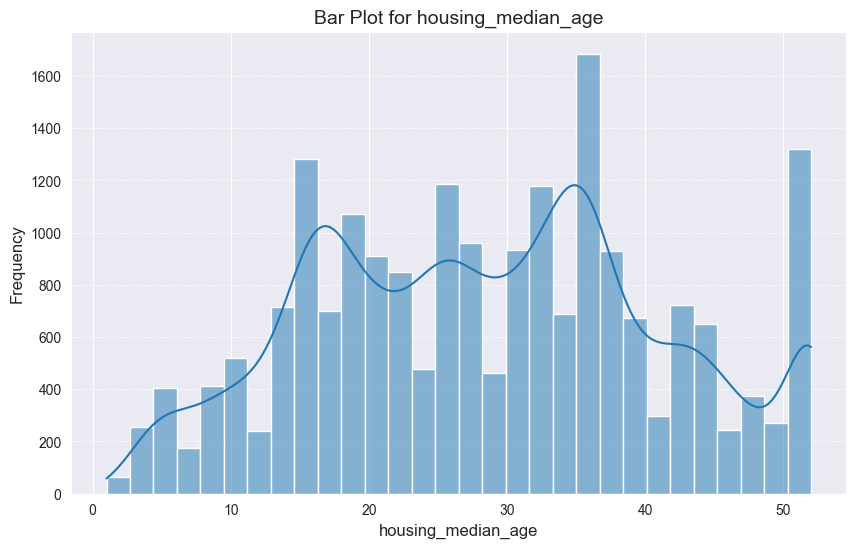

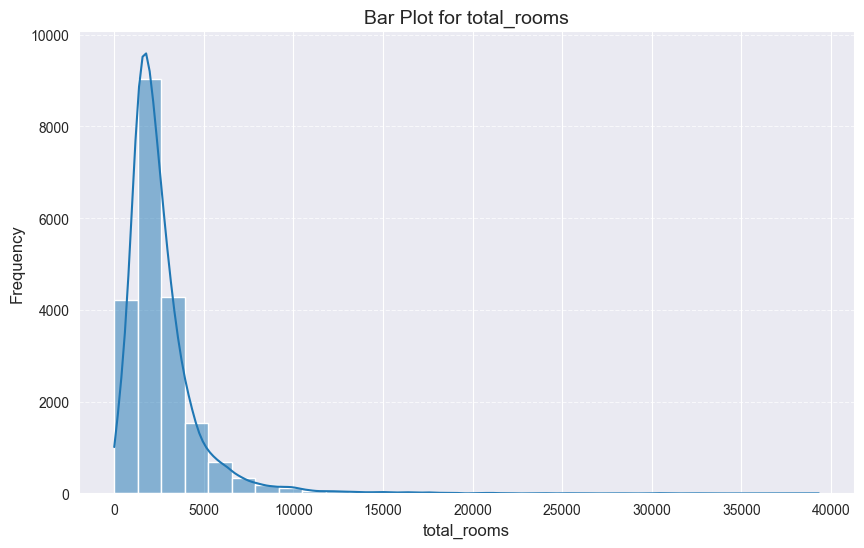

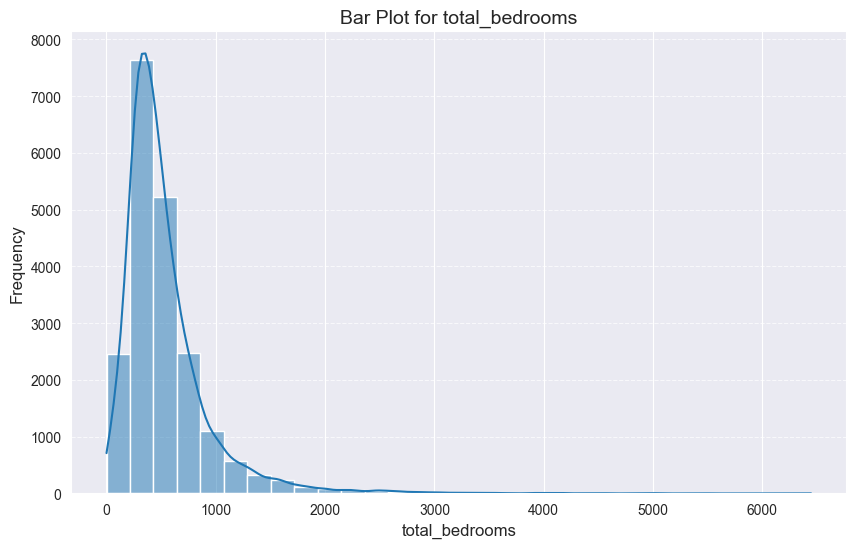

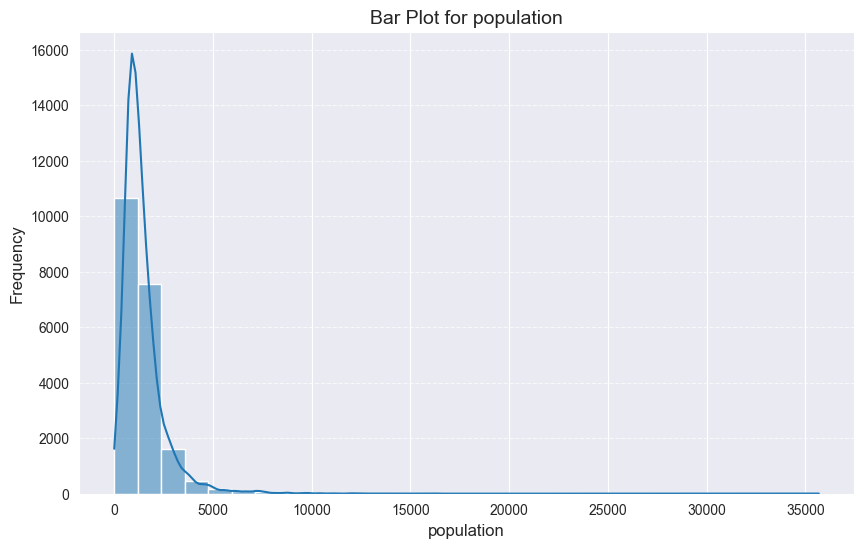

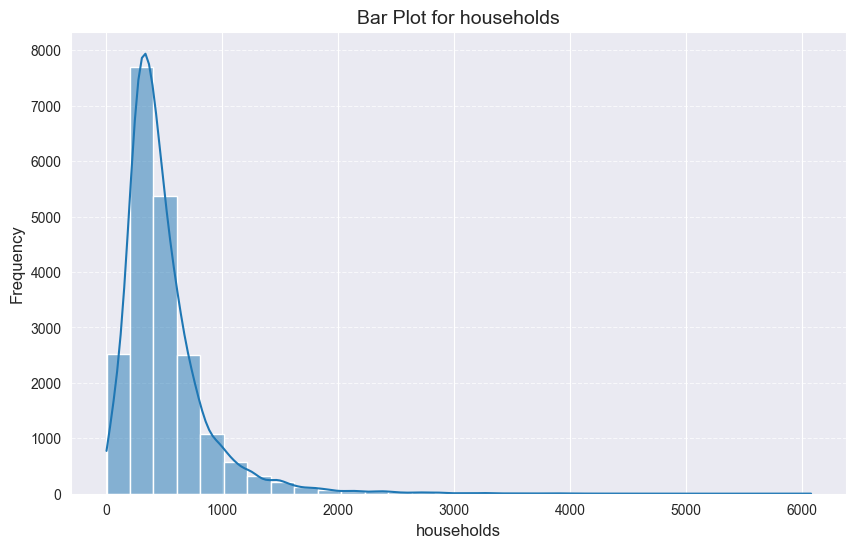

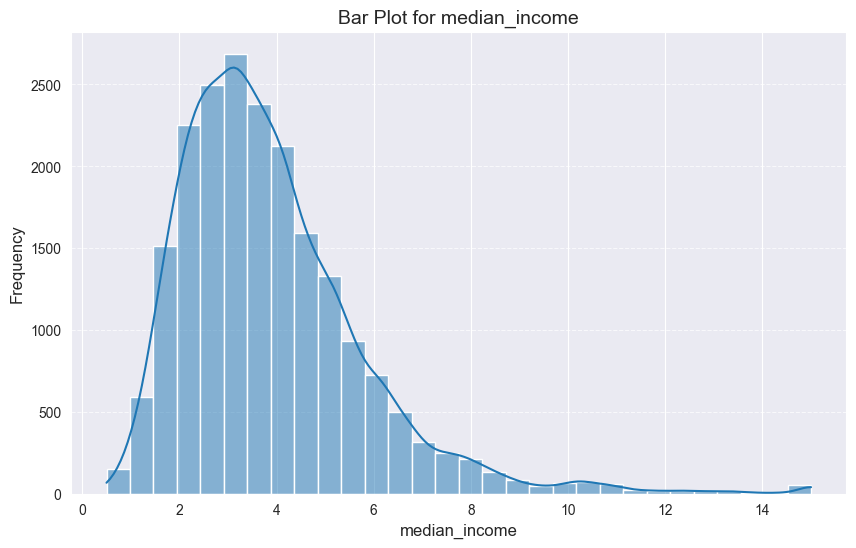

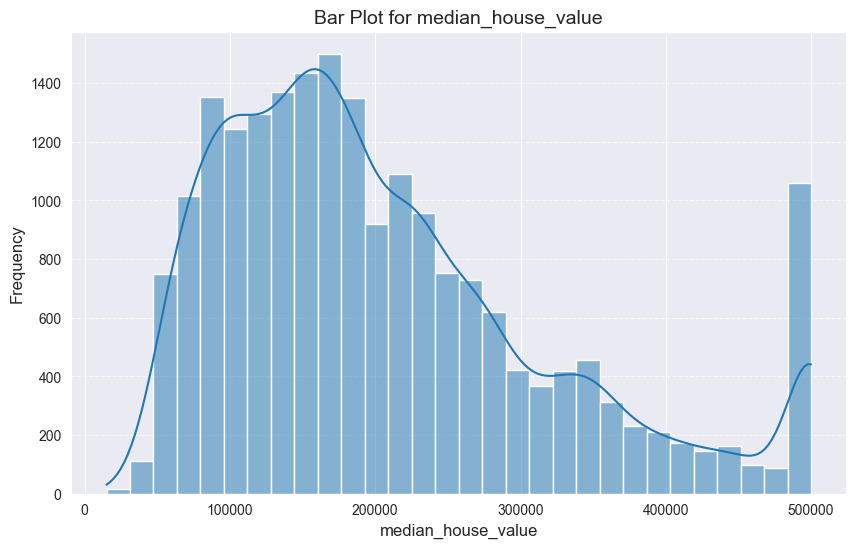

In [161]:


from chapter3.notebook.visualization import Visualization
# Reload the module to reflect any changes

viz = Visualization(housing)
viz.barplot_numeric(numeric_columns)

In [162]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [163]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


In [164]:
housing['income_category']=pd.cut(
    housing['median_income'],
    bins = [0, 1.5, 3, 4.5, 6, np.inf],
    labels = [1, 2, 3, 4, 5]
)

In [165]:
housing['income_category'].value_counts(normalize=True)*100

income_category
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: proportion, dtype: float64

In [166]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_category'], random_state=42)

In [167]:
strat_train_set['income_category'].value_counts(normalize=True)*100

income_category
3    35.059351
2    31.885901
4    17.629603
5    11.446221
1     3.978924
Name: proportion, dtype: float64

In [168]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_category', axis=1, inplace=True)

In [169]:
housing = strat_train_set.copy()


# Visualizing Geographical Data

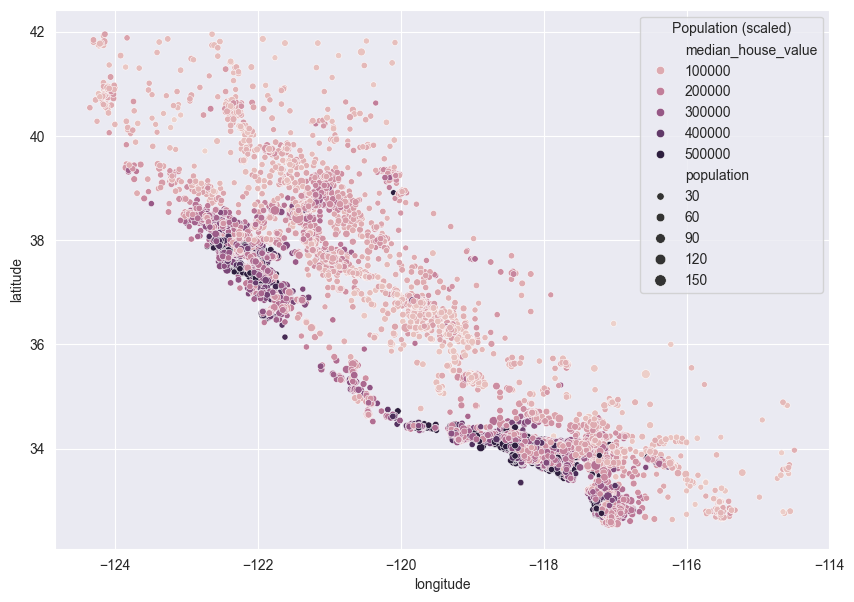

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))  # Create a figure and an Axes object
sns.scatterplot(
    data=housing,
    x="longitude",
    y="latitude",
    size=housing["population"] / 100,
    hue="median_house_value",
    # palette="jet",
    # legend="full",
    ax=ax  # Pass the Axes object to Seaborn
)
ax.grid(True)  # Add grid to the Axes
ax.legend(title="Population (scaled)")  # Add legend to the Axes
plt.show()
plt.close(fig)

In [171]:
corr_matrix = housing.corr(method='pearson',numeric_only=True)

In [172]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

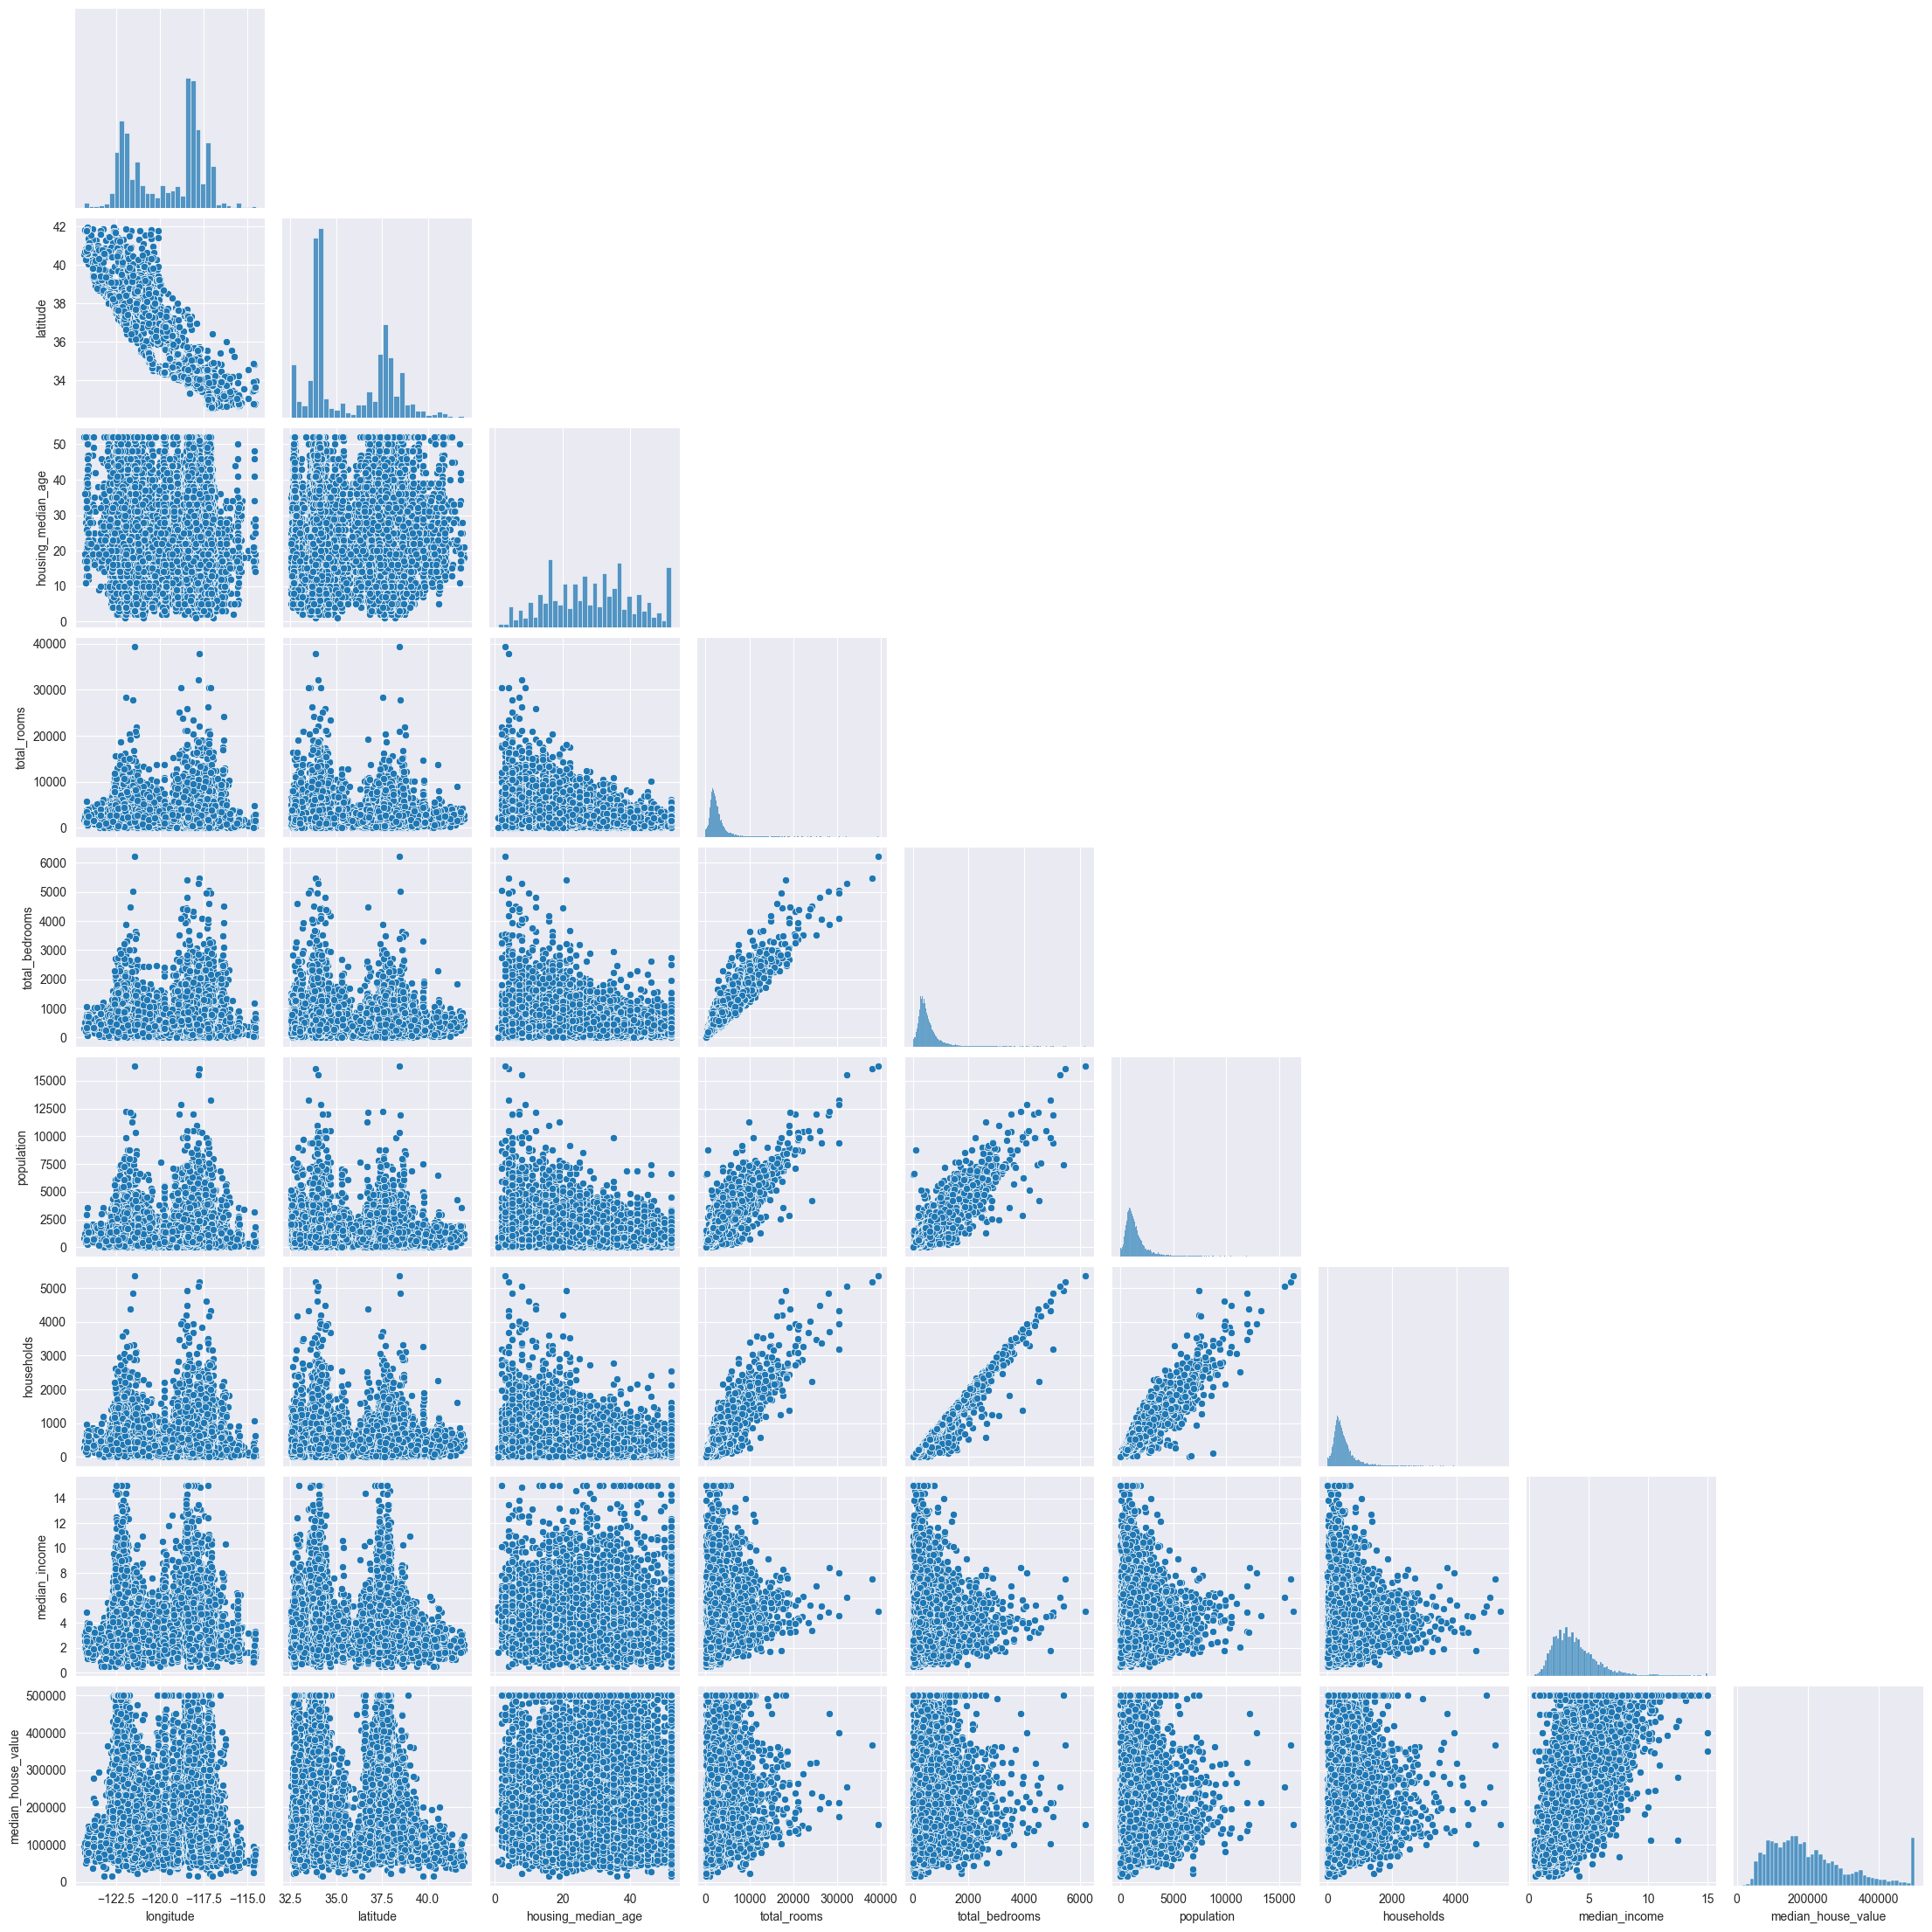

In [173]:
# Pairplot for all numeric columns
fig, ax = plt.subplots(figsize=(10, 7))
sns.pairplot(housing[numeric_columns],  corner=True)

plt.close(fig)

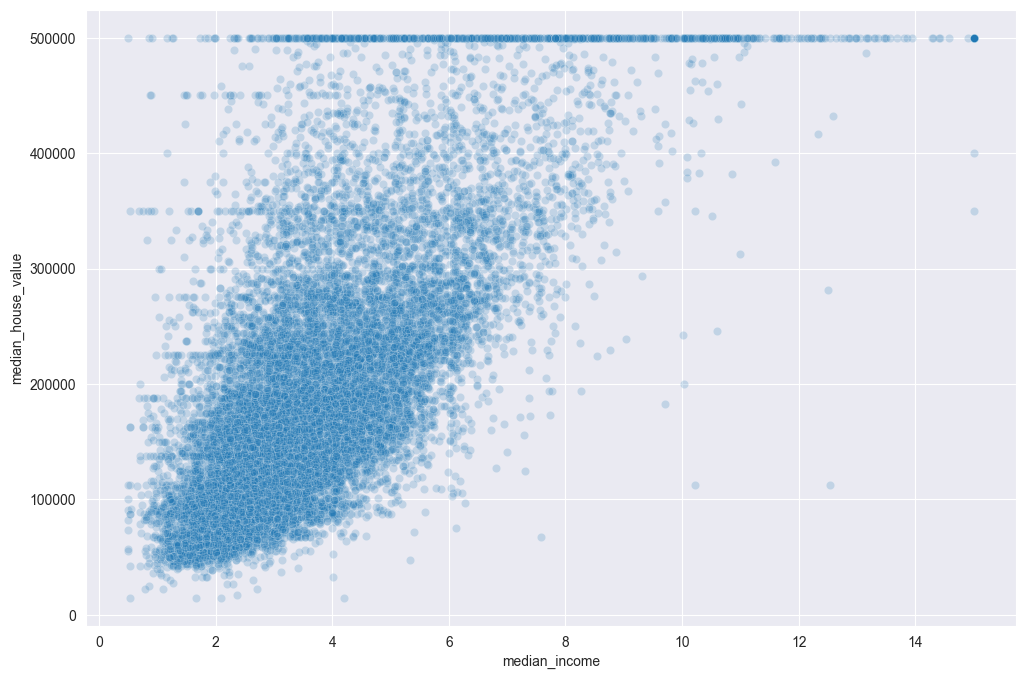

In [174]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    data=housing,
    x="median_income",
    y="median_house_value",
    ax=ax,
    alpha=0.2
)
plt.show()
plt.close(fig)

In [175]:
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['bedroom_ratio'] = housing['total_bedrooms']/housing['total_rooms']
housing['people_per_house'] = housing['population']/housing['households']

corr_matrix = housing.corr(method='pearson',numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedroom_ratio        -0.256397
Name: median_house_value, dtype: float64

In [176]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [177]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [178]:
housing_label

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [179]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.set_output(transform='pandas')
housing_num = housing.select_dtypes(include='float64')
X = imputer.fit_transform(housing_num)

In [180]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [181]:
housing.select_dtypes(include=[np.number])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [182]:
housing_tr=X
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [183]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
one_hot.set_output(transform = 'pandas')
housing_cat = housing[['ocean_proximity']]
one_hot.fit_transform(housing_cat)


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [184]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

min_max = MinMaxScaler()
min_max.set_output(transform = 'pandas')
min_max.fit_transform(housing_num)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,0.195740,0.558511,1.000000,0.084414,0.179417,0.096491,0.192832,0.110261
14973,0.605477,0.169149,0.764706,0.049926,0.056853,0.040670,0.066455,0.385353
3785,0.240365,0.618085,0.627451,0.027494,0.034788,0.034290,0.037708,0.133315
14689,0.734280,0.127660,0.313725,0.106109,0.136898,0.112992,0.145417,0.121509
20507,0.628803,0.129787,0.686275,0.110992,0.194878,0.117102,0.218592,0.208914
...,...,...,...,...,...,...,...,...
14207,0.603448,0.139362,0.784314,0.056844,0.095990,0.057355,0.097443,0.290382
13105,0.511156,0.401064,0.431373,0.074851,0.095184,0.086861,0.099123,0.142991
19301,0.739351,0.004255,0.235294,0.099649,0.124658,0.172433,0.141684,0.245631
19121,0.603448,0.160638,0.705882,0.096114,0.140441,0.105631,0.156244,0.251417


In [185]:
std_scaler = StandardScaler()
std_scaler.set_output(transform = 'pandas')
std_scaler.fit_transform(housing_num)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.136961,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.125165,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.556922,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.788136,0.273563,0.882868,0.145396


In [186]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [187]:
from sklearn.metrics.pairwise import rbf_kernel
rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

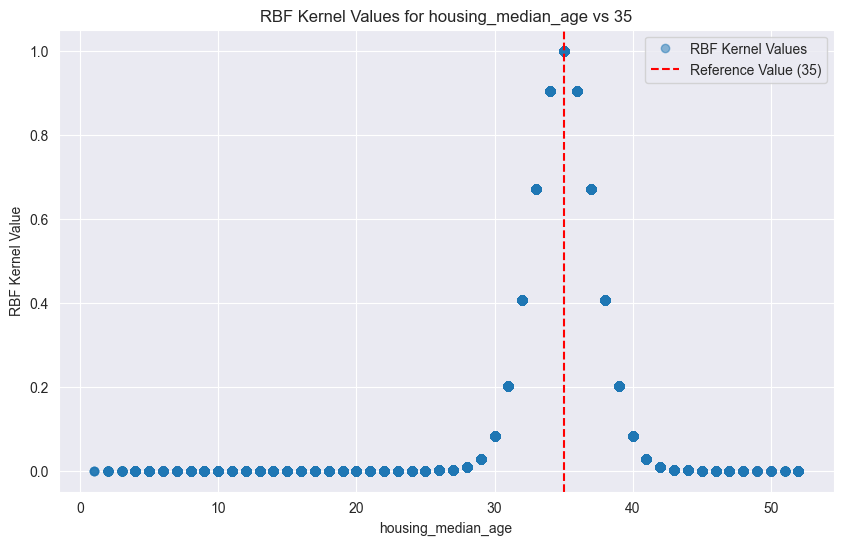

In [188]:
# Extract the housing_median_age column
housing_median_age = housing[['housing_median_age']]

# Compute RBF kernel values against the fixed value 35
kernel_values = rbf_kernel(housing_median_age, [[35]], gamma=0.1)

# Plot the RBF kernel values
plt.figure(figsize=(10, 6))
plt.plot(housing_median_age, kernel_values, 'o', alpha=0.5, label='RBF Kernel Values')
plt.axvline(x=35, color='red', linestyle='--', label='Reference Value (35)')
plt.title('RBF Kernel Values for housing_median_age vs 35')
plt.xlabel('housing_median_age')
plt.ylabel('RBF Kernel Value')
plt.legend()
plt.grid(True)
plt.show()

In [189]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)
log_transformer.fit_transform(housing[['population']])

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [190]:
rbf_transformer = FunctionTransformer(func=rbf_kernel, kw_args=dict(Y=[[35]], gamma=0.1))

In [191]:
rbf_transformer.fit_transform(housing[['housing_median_age']])

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

# Custom Transformer

In [192]:
housing[['latitude', 'longitude']]

,latitude,longitude
13096,37.80,-122.42
14973,34.14,-118.38
3785,38.36,-121.98
14689,33.75,-117.11
20507,33.77,-118.15
...,...,...
14207,33.86,-118.40
13105,36.32,-119.31
19301,32.59,-117.06
19121,34.06,-118.40


In [193]:

from chapter3.notebook.custom_transformer import ClusterSimilarity
importlib.reload(custom_transformer)
cluster_similarity = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)


# Pipeline

In [194]:
from sklearn.pipeline import Pipeline, make_pipeline
import  sklearn
sklearn.set_config(display="diagram")
num_pipeline =Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
])
num_pipeline



Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [195]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [196]:
num_pipeline.set_output(transform = 'pandas')
num_pipeline.fit_transform(housing_num)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [197]:
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

preprocessing = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_attribs),
        ('cat_pipeline', cat_pipeline, cat_attribs)
    ]
)
preprocessing.set_output(transform = 'pandas')

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ocean_proximity'])])

In [198]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)
preprocessing.set_output(transform = 'pandas')

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000244FE6A6C90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000244A2E50140>)])

In [199]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [200]:
housing_prepared = preprocessing.fit_transform(housing)

In [201]:
housing_prepared

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


# Final

In [202]:
cluster_similarity = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
)

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

In [203]:
preprocessing = ColumnTransformer(
    transformers=[
        ('bedrooms', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
        ('rooms_per_house',ratio_pipeline(), ['total_rooms', 'households']),
        ('people_per_house', ratio_pipeline(), ['population', 'households']),
        ('log', log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ('geo', cluster_similarity, ['latitude', 'longitude']),
        ('cat', cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline
)

In [204]:

housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

array([[ 1.84662439, -0.86602737, -0.33020372, ...,  1.        ,
         0.        ,  1.86111875],
       [-0.5081207 ,  0.0245495 , -0.25361631, ...,  0.        ,
         0.        ,  0.90762971],
       [-0.20215476, -0.04119332, -0.05104091, ...,  0.        ,
         0.        ,  0.35142777],
       ...,
       [-0.24249175, -0.10998748,  0.15854151, ...,  0.        ,
         1.        , -1.23772062],
       [ 0.25977479, -0.36093745, -0.21033248, ...,  0.        ,
         0.        ,  0.66925745],
       [ 3.61270996, -1.32397227,  0.04958379, ...,  0.        ,
         1.        ,  1.22545939]], shape=(16512, 24))

In [205]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [206]:
transformed_df = pd.DataFrame(data=housing_prepared, columns=preprocessing.get_feature_names_out())
transformed_df

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
0,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,4.581829e-01,1.241847e-14,...,8.489216e-04,9.770322e-01,2.382191e-08,3.819126e-18,0.0,0.0,0.0,1.0,0.0,1.861119
1,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,6.511495e-10,9.579596e-01,...,5.614049e-27,1.260964e-13,1.103491e-01,3.547610e-01,1.0,0.0,0.0,0.0,0.0,0.907630
2,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,3.432506e-01,4.261141e-15,...,5.641131e-03,7.303265e-01,2.508224e-08,2.669659e-18,0.0,1.0,0.0,0.0,0.0,0.351428
3,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,2.244844e-15,2.704823e-01,...,5.913326e-35,5.201263e-20,1.712982e-03,8.874598e-01,0.0,1.0,0.0,0.0,0.0,-0.919891
4,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,1.090228e-11,9.422206e-01,...,5.421817e-30,1.048030e-15,2.568824e-02,5.279506e-01,0.0,0.0,0.0,0.0,1.0,0.589800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.804368,-0.452111,-0.269780,0.465581,0.109720,-0.247054,0.379471,0.648953,1.115293e-10,9.505920e-01,...,1.878046e-28,1.651285e-14,4.776856e-02,3.463930e-01,1.0,0.0,0.0,0.0,0.0,0.987087
16508,-0.192328,0.036792,-0.073741,0.454022,0.477277,0.314542,0.402773,-0.637675,1.409886e-03,1.430917e-03,...,7.663746e-14,9.538119e-06,4.530237e-01,9.507766e-05,0.0,1.0,0.0,0.0,0.0,-0.443146
16509,-0.242492,-0.109987,0.158542,0.824206,0.859552,1.243381,0.889897,0.333540,8.098794e-20,3.501819e-02,...,1.715187e-42,5.158970e-25,5.966953e-06,1.346576e-01,0.0,0.0,0.0,0.0,1.0,-1.237721
16510,0.259775,-0.360937,-0.210332,0.987851,0.811293,0.579462,1.023329,0.377051,4.385614e-10,9.667073e-01,...,2.464809e-27,8.018690e-14,8.956217e-02,3.478114e-01,1.0,0.0,0.0,0.0,0.0,0.669257


# Model

In [207]:
housing_label

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [208]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X=housing, y=housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000244A2E50860>)])),
                ('linearregression', LinearRegression())])

In [209]:

housing_test = strat_test_set.drop('median_house_value', axis=1)
housing_label_test = strat_test_set['median_house_value'].copy()

In [210]:
y_pred = lin_reg.predict(housing_test)

In [211]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
mse = mean_squared_error(housing_label_test, y_pred)
rmse = root_mean_squared_error(y_true=housing_label_test, y_pred=y_pred)
r2 = r2_score(housing_label_test, y_pred)

print(f'Mean Squared Error: ${mse:.2f}')
print(f'Root Mean Squared Error: ${rmse:.2f}')
print(f'R² Score: {r2:.3f}')

Mean Squared Error: $5788275564.11
Root Mean Squared Error: $76080.72
R² Score: 0.568


In [212]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X=housing, y=housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000244A2E50860>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [213]:
housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,NEAR BAY
...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,NEAR BAY


In [214]:
y_pred = tree_reg.predict(housing_test)

In [215]:
mse = mean_squared_error(housing_label_test, y_pred)
rmse = root_mean_squared_error(y_true=housing_label_test, y_pred=y_pred)
r2 = r2_score(housing_label_test, y_pred)

print(f'Mean Squared Error: ${mse:.2f}')
print(f'Root Mean Squared Error: ${rmse:.2f}')
print(f'R² Score: {r2:.3f}')

Mean Squared Error: $4527299030.23
Root Mean Squared Error: $67285.21
R² Score: 0.662


In [216]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [217]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(estimator=tree_reg,
                        X=housing,
                        y=housing_label,
                        scoring='neg_root_mean_squared_error',
                        cv=kf)

# Get final RMSE
rmse_scores = -scores
print(f"RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")

RMSE scores: [71775.29378966 66597.22785726 69908.16891875 70886.9611877
 68149.16969605 64503.41386247 61624.05841622 63437.8075218
 67389.96171333 65134.34185827]
Mean RMSE: 66940.64 ± 3150.76


In [218]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
scores = cross_val_score(estimator=forest_reg,
                        X=housing,
                        y=housing_label,
                        scoring='neg_root_mean_squared_error',
                        cv=kf)
rmse_scores = -scores
print(f"RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")


RMSE scores: [47684.5208044  50227.50619026 49692.32503654 49838.02021822
 50968.66837267 43537.93275279 41170.20260702 45860.75035627
 46353.22952743 45741.03075567]
Mean RMSE: 47107.42 ± 3018.23


# Fine-Tune Your Model

In [219]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_label)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000244A2E50860>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [220]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [221]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000024...
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000244A2DCD2E0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [222]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.540664,0.314955,0.163065,0.032781,5,4,"{'preprocessing__geo__n_clusters': 5, 'random_forest__max_features': 4}",-46226.404919,-46146.401866,-47195.120579,-46522.642455,476.634202,13
1,6.567895,0.227601,0.153447,0.021057,5,6,"{'preprocessing__geo__n_clusters': 5, 'random_forest__max_features': 6}",-46473.214688,-46383.628085,-47620.692379,-46825.845050,563.230649,14
2,8.247248,0.292220,0.148082,0.003458,5,8,"{'preprocessing__geo__n_clusters': 5, 'random_forest__max_features': 8}",-46839.745574,-46904.579633,-47813.212568,-47185.845925,444.404127,15
3,4.633693,0.091998,0.144257,0.010989,8,4,"{'preprocessing__geo__n_clusters': 8, 'random_forest__max_features': 4}",-44511.046790,-44519.243029,-45214.107933,-44748.132584,329.511319,7
4,6.274192,0.216290,0.153781,0.021057,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_forest__max_features': 6}",-44851.823543,-44827.316247,-45654.572385,-45111.237392,384.326110,10
5,8.104316,0.260175,0.128553,0.012835,8,8,"{'preprocessing__geo__n_clusters': 8, 'random_forest__max_features': 8}",-45567.827559,-45323.269449,-46133.989451,-45675.028820,339.544610,12
6,4.528499,0.110958,0.147999,0.009874,10,4,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 4}",-43797.854175,-44036.240246,-44960.694004,-44264.929475,501.513170,3
7,6.381155,0.079686,0.126734,0.013740,10,6,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 6}",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
8,7.740117,0.581784,0.127978,0.020519,10,8,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 8}",-44498.988402,-44883.300454,-45264.655671,-44882.314842,312.583131,8
9,4.721307,0.099064,0.096144,0.001534,10,6,"{'preprocessing__geo__n_clusters': 10, 'random_forest__max_features': 6}",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4


In [223]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [224]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_label)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024480425820>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024502F330E0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [225]:

final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
sorted(zip(feature_importances,final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(np.float64(0.18599734460509473), 'log__median_income'),
 (np.float64(0.07338850855844488), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06556941990883974), 'bedrooms__ratio'),
 (np.float64(0.05364871007672531), 'rooms_per_house__ratio'),
 (np.float64(0.04598870861894748), 'people_per_house__ratio'),
 (np.float64(0.04175269214442518), 'geo__Cluster 30 similarity'),
 (np.float64(0.025976797232869678), 'geo__Cluster 25 similarity'),
 (np.float64(0.023595895886342252), 'geo__Cluster 36 similarity'),
 (np.float64(0.02021056221732893), 'geo__Cluster 9 similarity'),
 (np.float64(0.018606917076661445), 'geo__Cluster 34 similarity'),
 (np.float64(0.01813798837462886), 'geo__Cluster 37 similarity'),
 (np.float64(0.017404353166326745), 'geo__Cluster 18 similarity'),
 (np.float64(0.01677838614384489), 'geo__Cluster 1 similarity'),
 (np.float64(0.015459009666188978), 'geo__Cluster 7 similarity'),
 (np.float64(0.015325731028175922), 'geo__Cluster 32 similarity'),
 (np.float64(0.01507377201503834

In [226]:
from sklearn.feature_selection import SelectFromModel
# Create feature selector using the random forest from best model
selector = SelectFromModel(
    estimator=final_model['random_forest'],
    prefit=True  # Use already fitted model
)

# Get feature names after preprocessing
feature_names = final_model['preprocessing'].get_feature_names_out()

# Get selected features and their importance scores
selected_features_mask = selector.get_support()
selected_features = feature_names[selected_features_mask]
feature_importance = pd.Series(
    final_model['random_forest'].feature_importances_,
    index=feature_names
)[selected_features_mask]

print("Selected features and their importance scores:")
for feat, imp in zip(selected_features, feature_importance):
    print(f"{feat}: {imp:.4f}")

Selected features and their importance scores:
bedrooms__ratio: 0.0656
rooms_per_house__ratio: 0.0536
people_per_house__ratio: 0.0460
log__median_income: 0.1860
geo__Cluster 9 similarity: 0.0202
geo__Cluster 18 similarity: 0.0174
geo__Cluster 25 similarity: 0.0260
geo__Cluster 30 similarity: 0.0418
geo__Cluster 34 similarity: 0.0186
geo__Cluster 36 similarity: 0.0236
geo__Cluster 37 similarity: 0.0181
cat__ocean_proximity_INLAND: 0.0734


In [227]:
final_predictions = final_model.predict(housing)

final_rmse = root_mean_squared_error(housing_label, final_predictions)
print(final_rmse)

15294.062420421913


In [228]:
housing_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,NEAR BAY
...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,NEAR BAY


In [229]:
housing_label_test

3905     397700.0
16821    202900.0
2900     310000.0
7193     314300.0
13928    187500.0
           ...   
12369     90600.0
8707      59400.0
16634    246200.0
9779     214700.0
3455     163400.0
Name: median_house_value, Length: 4128, dtype: float64

In [230]:
from scipy.stats import t, sem
confidence = 0.95
squared_errors = (final_predictions - housing_label) ** 2
np.sqrt(t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=sem(squared_errors)))

array([14896.99080076, 15681.08273435])

In [231]:
import joblib
joblib.dump(final_model, 'california_housing_model.pkl')

['california_housing_model.pkl']

In [232]:
import os
print(os.path.abspath('california_housing_model.pkl'))

D:\data science\Hands_On_Machine_Learning\chapter2\notebook\california_housing_model.pkl
